# Neural Networks Introduction

## 🧠 Introduction to Neural Networks: A Visual Guide

**Objective:** To understand the fundamental structure and components of a basic neural network, and to build an intuition for how it processes information.



## Topic 1: The Problem - Easy for You, Hard for a Computer

Your brain can instantly recognize handwritten digits, even though the pixel data for each is very different. This is an incredible feat of **pattern recognition**.

If I asked you to write a traditional computer program with fixed rules (e.g., `if/else` statements) to recognize these, the task would become dauntingly difficult.

![A collage of handwritten digits from the MNIST dataset](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)



**The Goal:** Build a system that can *learn* to recognize these patterns on its own, without explicit programming for every possibility. This is the motivation for neural networks.



## Topic 2: What is a Neuron?

Forget biology for a moment. In this context, a **neuron** is simply a thing that **holds a number**. Specifically, it holds a number between **0 and 1**.

This number is called the neuron's **"activation"**.

You can think of it like a lightbulb:
* Activation of 0 = Off ⚫
* Activation of 1 = Fully On ⚪

![A single glowing lightbulb representing an activated neuron](./images/neuron_perceptron.png)




## The Anatomy of the Network - Layers

A neural network organizes these neurons into distinct layers.

* **Input Layer:** Receives the initial data. For a 28x28 pixel image, this layer has **784 neurons**.
* **Hidden Layers:** The layers in the middle where the real processing happens. We'll use **2 hidden layers** in our example.
* **Output Layer:** Produces the final result. To identify digits 0-9, we need **10 neurons**.
![A simple diagram of a perceptron](./images/perceptron.png)

![A simple diagram of a neural network with input, hidden, and output layers](./images/simple_neural_network.png)


## Topic 2 (Cont.): How Information Flows - The Big Idea

The **activations** in one layer determine the **activations** in the next layer.

When we feed an image into the input layer, the pattern of activated neurons triggers a specific pattern in the next layer, which in turn triggers the next, and so on, until a final pattern emerges in the output layer.

The **brightest neuron in the output layer** is the network's final answer.

![An animation showing information flowing through a neural network](./images/Backpropagation.gif)


## The Hidden Layers - Abstraction

How does a network recognize a "9"? We recognize it as a **loop on top of a line**.

![A diagram showing a neural network building complex shapes from simple edges](./images/cnn_diagram.png)

**The Hope:** We wish for the network to learn hierarchically, building up abstractions:

* **First Hidden Layer:** Neurons might learn to recognize simple **edges and curves**.
* **Second Hidden Layer:** Neurons combine those signals to recognize more complex shapes like **loops or corners**.
* **Output Layer:** Neurons then combine these higher-level shapes to recognize complete **digits**.


## Topic 4: The Mechanics: Weights

How does one layer influence the next? With **weights**.

Every connection between neurons has a **weight**, which is just a number (positive or negative). Weights are the "dials and knobs" of the network, controlling how much influence one neuron has on the next.

To detect a specific pattern, a neuron might assign **positive weights** to pixels forming the pattern and **negative weights** to the surrounding pixels.

![A diagram showing connection weights between two layers of neurons](./images/maxresdefault.jpg)


## The Mechanics: Bias

After calculating the **weighted sum** (summing up previous neuron activations multiplied by their weights), we add one final number called a **bias**.

The bias acts as an "activation threshold"—it determines how high the weighted sum needs to be before the neuron starts to become meaningfully active.

`Neuron's Input = (Weighted Sum) + Bias`

![A diagram illustrating a bias being added into a neuron's calculation](./images/llustration-of-a-single-neuron-perceptron-in-a-standard-ANN-Each-feature-coefficient-x.ppm)


## The "Squishification": Activation Functions

The `Neuron's Input` (weighted sum + bias) can be any real number. We need to "squish" this value into the **0-to-1 range** to become the neuron's final activation. This is the job of an **activation function**.

A classic choice is the **Sigmoid function**. It takes any number and maps it to a value between 0 and 1.


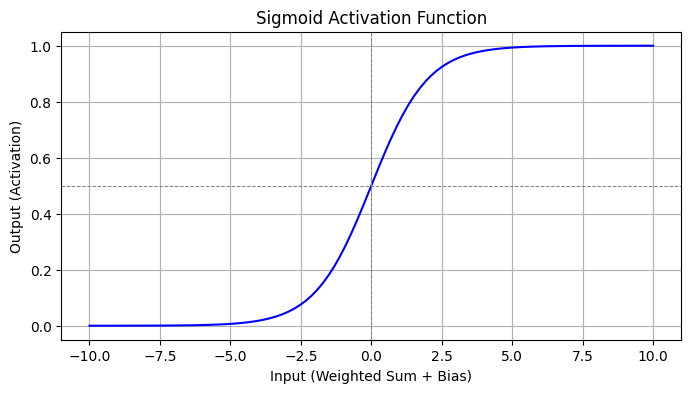

In [1]:
# Let's visualize the sigmoid function!
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    """A function that maps any value to a value between 0 and 1."""
    return 1 / (1 + np.exp(-x))

# Generate a range of numbers to plot
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

# Plot the function
plt.figure(figsize=(8, 4))
plt.plot(x, y, color='blue')
plt.title("Sigmoid Activation Function")
plt.xlabel("Input (Weighted Sum + Bias)")
plt.ylabel("Output (Activation)")
plt.grid(True)
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.show()

## Modern Activation Functions - ReLU

While Sigmoid is great for understanding the concept, most modern networks use a different activation function. A very common one is the **ReLU (Rectified Linear Unit)**.

`ReLU(x) = max(0, x)`

![A graph showing the simple, hinged shape of the ReLU activation function](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Rectifier_and_softplus_functions.svg/640px-Rectifier_and_softplus_functions.svg.png)

ReLU has been found to help networks train faster and more effectively for many tasks.


## Topic 6: The Network as a Giant, Complicated Function

Ultimately, the entire neural network is just one massive mathematical function.

* **Input:** 784 numbers (pixel values).
* **Parameters:** Thousands of "dials and knobs" in the form of **weights** and **biases**. Our example network has almost **13,000**!
* **Output:** 10 numbers (confidence scores for each digit).

![An abstract image representing a complex black box function](./images/hidden-layers.png)

**"Learning"** is the process of automatically finding the right settings for all these parameters so the function consistently gives the correct output.


In [2]:
# Let's calculate the total number of parameters in our example network!

input_neurons = 784
hidden_layer_1_neurons = 16
hidden_layer_2_neurons = 16
output_neurons = 10

# Parameters for Input -> Hidden 1
params_l1 = (input_neurons * hidden_layer_1_neurons) + hidden_layer_1_neurons

# Parameters for Hidden 1 -> Hidden 2
params_l2 = (hidden_layer_1_neurons * hidden_layer_2_neurons) + hidden_layer_2_neurons

# Parameters for Hidden 2 -> Output
params_l3 = (hidden_layer_2_neurons * output_neurons) + output_neurons

total_parameters = params_l1 + params_l2 + params_l3

print(f"Parameters (W+b) for Input -> Hidden 1: {params_l1}")
print(f"Parameters (W+b) for Hidden 1 -> Hidden 2: {params_l2}")
print(f"Parameters (W+b) for Hidden 2 -> Output: {params_l3}")
print(f"---------------------------------------------------")
print(f"Total learnable parameters in the network: {total_parameters}")

Parameters (W+b) for Input -> Hidden 1: 12560
Parameters (W+b) for Hidden 1 -> Hidden 2: 272
Parameters (W+b) for Hidden 2 -> Output: 170
---------------------------------------------------
Total learnable parameters in the network: 13002


# How a Neural Network *Actually* Works: From Pixels to Patterns

This notebook breaks down the core mechanics of how a single neuron processes information, inspired by the explanation from 3Blue1Brown's "Deep Learning" series. We'll explore the roles of **weights**, the **weighted sum**, the **sigmoid activation function**, and the **bias**.

> "The goal is to have some mechanism that could conceivably combine pixels into edges, or edges into patterns, or patterns into digits."

## The Building Blocks: Weights

The fundamental "dials and knobs" of a network are its **weights**. For a neuron designed to recognize a pattern in an image, there's one weight for every single pixel in the input. These weights determine which pixels are important for the pattern it's trying to detect.

> "What we'll do is assign a weight to each one of the connections between our neuron and the neurons from the first layer. These weights are just numbers... I'm going to use green pixels to indicate positive weights, and red pixels to indicate negative weights..."

Let's simulate this. Imagine our neuron is trying to detect a simple vertical bar in the center of a tiny 7x7 image. We can design a "weight matrix" for this task. We'll assign **positive weights (green)** to the area where we *want* to see bright pixels and **negative weights (red)** to the surrounding areas to penalize bright pixels there.

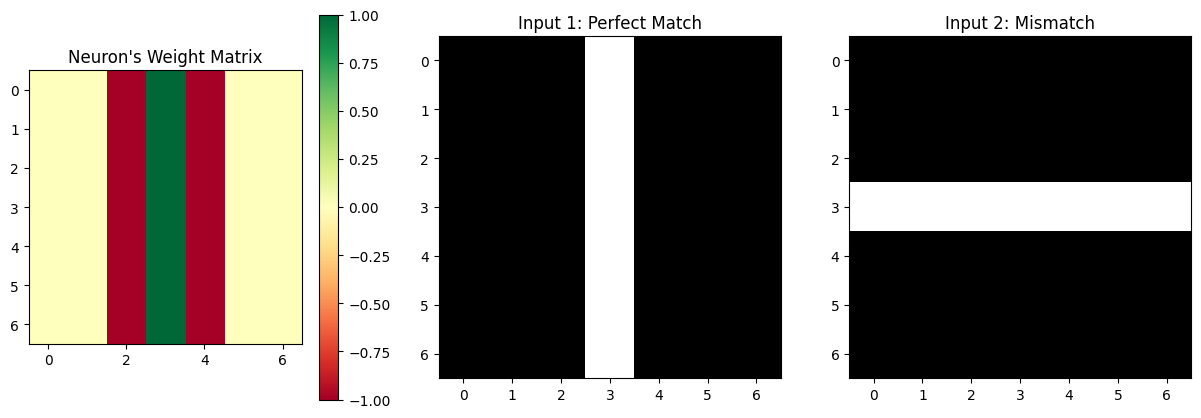

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create a weight matrix designed to detect a vertical bar
# A real network would have to *learn* these values
weights = np.zeros((7, 7))
weights[:, 3] = 1.0   # Positive weights (the bar)
weights[:, 2] = -1.0  # Negative weights (the surrounding area)
weights[:, 4] = -1.0  # Negative weights (the surrounding area)

# Create two example 7x7 images (0=black, 1=white)
# 1. An image that perfectly matches our pattern
perfect_image = np.zeros((7, 7))
perfect_image[:, 3] = 1.0

# 2. An image of a horizontal bar that does NOT match
mismatch_image = np.zeros((7, 7))
mismatch_image[3, :] = 1.0

# --- Visualization ---
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the weights
axs[0].set_title("Neuron's Weight Matrix")
im0 = axs[0].imshow(weights, cmap='RdYlGn')
fig.colorbar(im0, ax=axs[0])

# Plot the perfect image
axs[1].set_title("Input 1: Perfect Match")
axs[1].imshow(perfect_image, cmap='gray')

# Plot the mismatched image
axs[2].set_title("Input 2: Mismatch")
axs[2].imshow(mismatch_image, cmap='gray')

plt.show()

## The First Calculation: The Weighted Sum

Now that we have our weights and an input image, the first step is to compute the **weighted sum**. This calculation directly measures how well the input pattern aligns with the neuron's preferred pattern (defined by its weights).

> "Then take all of those activations from the first layer and compute their weighted sum according to these weights... the sum is largest when those middle pixels are bright but the surrounding pixels are darker."

We calculate this by multiplying the image pixels by their corresponding weights and summing the results. A large positive result means a strong match!

In [4]:
# Calculate the weighted sum for both images
# This is done by element-wise multiplication and then summing the result
weighted_sum_perfect = np.sum(perfect_image * weights)
weighted_sum_mismatch = np.sum(mismatch_image * weights)

print(f"Weighted Sum for the 'Perfect Match' Image: {weighted_sum_perfect:.1f}")
print(f"Weighted Sum for the 'Mismatch' Image: {weighted_sum_mismatch:.1f}")

Weighted Sum for the 'Perfect Match' Image: 7.0
Weighted Sum for the 'Mismatch' Image: -1.0


## The "Squishification": The Sigmoid Function

The weighted sum can be any number, but a neuron's activation should be a predictable value between **0 (off)** and **1 (on)**. We need a function to "squish" the unbounded weighted sum into this range.

> "When you compute a weighted sum like this, you might come out with any number, but for this network what we want is for activations to be some value between 0 and 1... a common function that does this is called the sigmoid function..."

The sigmoid function takes any real number and maps it to the (0, 1) interval. Very negative inputs are close to 0, very positive inputs are close to 1, and an input of 0 maps to 0.5.

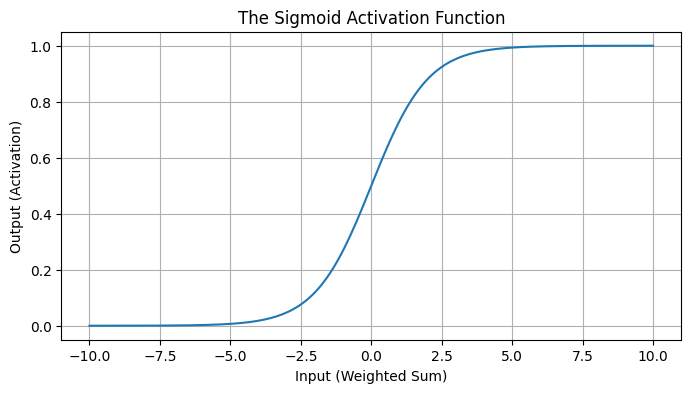

Activation for 'Perfect Match': 0.9991  <-- This neuron is highly active!
Activation for 'Mismatch': 0.2689      <-- This neuron is barely active.


In [5]:
def sigmoid(x):
    """A function that maps any value to a value between 0 and 1."""
    return 1 / (1 + np.exp(-x))

# --- Visualization ---
x = np.linspace(-10, 10, 200)
plt.figure(figsize=(8, 4))
plt.plot(x, sigmoid(x))
plt.title("The Sigmoid Activation Function")
plt.xlabel("Input (Weighted Sum)")
plt.ylabel("Output (Activation)")
plt.grid(True)
plt.show()

# Now let's apply the sigmoid to our weighted sums
activation_perfect = sigmoid(weighted_sum_perfect)
activation_mismatch = sigmoid(weighted_sum_mismatch)

print(f"Activation for 'Perfect Match': {activation_perfect:.4f}  <-- This neuron is highly active!")
print(f"Activation for 'Mismatch': {activation_mismatch:.4f}      <-- This neuron is barely active.")

## The Final Tweak: The Bias

What if we only want our neuron to become active for a *really* strong signal? We can introduce a **bias** to make it "harder" or "easier" for the neuron to activate.

> "But maybe it's not that you want the neuron to light up when the weighted sum is bigger than 0. Maybe you only want it to be active when the sum is bigger than say 10. That is, you want some bias for it to be inactive... That additional number is called the bias."

The bias is simply a number that's **added** to the weighted sum *before* it goes into the activation function. A negative bias means the weighted sum has to be even larger to overcome it and produce a high activation.

In [6]:
# Let's set a bias to make the neuron more "skeptical"
# It will only fire for very strong signals.
bias = -5.0

# Recalculate the activations with the bias included
activation_perfect_with_bias = sigmoid(weighted_sum_perfect + bias)
activation_mismatch_with_bias = sigmoid(weighted_sum_mismatch + bias)

print(f"Original activation for 'Perfect Match': {activation_perfect:.4f}")
print(f"Activation with a negative bias: {activation_perfect_with_bias:.4f} <-- Still active, but less so.")
print("-" * 50)
print(f"Original activation for 'Mismatch': {activation_mismatch:.4f}")
print(f"Activation with a negative bias: {activation_mismatch_with_bias:.4f} <-- Now even closer to zero.")

Original activation for 'Perfect Match': 0.9991
Activation with a negative bias: 0.8808 <-- Still active, but less so.
--------------------------------------------------
Original activation for 'Mismatch': 0.2689
Activation with a negative bias: 0.0025 <-- Now even closer to zero.


## Scaling Up: The Whole Network

This entire process—calculating a weighted sum, adding a bias, and applying an activation function—is what a single neuron does. A neural network does this for thousands of neurons across multiple layers.

> "And that is just one neuron... With this hidden layer of 16 neurons, that's a total of 784 times 16 weights, along with 16 biases... All said and done, this network has almost exactly 13,000 total weights and biases. 13,000 knobs and dials that can be tweaked..."

The process of **learning** is simply the computer's task of finding the optimal settings for all these thousands of weights and biases to solve a problem, like recognizing handwritten digits.

In [7]:
# Let's calculate the total parameters for the network described in the text
input_neurons = 784  # For a 28x28 image
hidden_layer_neurons = 16

# Parameters connecting the input layer to the first hidden layer
weights_l1 = input_neurons * hidden_layer_neurons
biases_l1 = hidden_layer_neurons  # One bias per neuron in the hidden layer

total_params_l1 = weights_l1 + biases_l1

print(f"Number of weights from input to hidden layer: {weights_l1}")
print(f"Number of biases in the hidden layer: {biases_l1}")
print(f"Total Parameters for just this first connection: {total_params_l1}")
print("\n(Note: The ~13,000 number includes connections between other layers too!)")

Number of weights from input to hidden layer: 12544
Number of biases in the hidden layer: 16
Total Parameters for just this first connection: 12560

(Note: The ~13,000 number includes connections between other layers too!)


# The Language of Neural Networks: A Compact Notation

Calculating the output of every neuron in a layer involves thousands of individual multiplications and additions. Writing this out one by one would be incredibly tedious. Fortunately, there's a much cleaner way to represent these operations using the language of linear algebra.



## Step 1: Organize Activations into a Vector

First, we take all the numerical outputs (activations) from a single layer and arrange them into a list. In linear algebra, an ordered list of numbers is called a **vector**.

<mark>Organize all of the activations from one layer into a column as a vector.</mark>

This turns a large set of individual neuron values into a single, manageable mathematical object.

## Step 2: Organize Weights into a Matrix

Next, we need to handle the weights. Remember, every neuron in the next layer is connected to *every* neuron in the current layer. We can organize all of these connection weights into a grid, or **matrix**.

<mark>Then organize all of the weights as a matrix, where each row of that matrix corresponds to the connections between one layer and a particular neuron in the next layer.</mark>

This is the most crucial concept: each row of the weight matrix contains all the weights leading into a *single* neuron in the next layer.

## Step 3: The Power of Matrix-Vector Multiplication

With our activations as a vector and weights as a matrix, we can now calculate all of the weighted sums for the next layer in a single, powerful operation: the **matrix-vector product**.

<mark>Taking the weighted sum of the activations in the first layer... corresponds to one of the terms in the matrix vector product.</mark>

Multiplying our weight matrix `W` by our activation vector `a` (`W @ a`) automatically computes the weighted sum for each neuron in the next layer.

## Step 4: Adding the Bias Vector

Just like with the activations and weights, we can group the biases for the new layer into a single vector.

<mark>Instead of talking about adding the bias to each one of these values independently, we represent it by organizing all those biases into a vector, and adding the entire vector to the previous matrix vector product.</mark>

## Step 5: Applying the Final Activation

Finally, we apply our "squishification" function (like the sigmoid) to the result.

<mark>Then as a final step, I'll wrap a sigmoid around the outside here, and what that's supposed to represent is that you're going to apply the sigmoid function to each specific component of the resulting vector inside.</mark>

This gives us the final activation values for our second layer, again in a single, neat vector.

## The Big Picture: The Network as a Single Function

By using vectors and matrices, we can describe the entire calculation for a layer with one simple expression: `activation_L2 = sigmoid(W @ a + b)`.

<mark>You can communicate the full transition of activations from one layer to the next in an extremely tight and neat little expression, and this makes the relevant code both a lot simpler and a lot faster.</mark>

When you zoom out, you can see that the entire network is just one giant, complex function. It's a function that takes an input vector (like 784 pixels) and, by chaining these matrix operations together, transforms it into an output vector (like 10 digit probabilities).

<mark>Really the entire network is just a function, one that takes in 784 numbers as an input and spits out 10 numbers as an output.</mark> It's an absurdly complicated function, but a function nonetheless.

# 📊 Binary Classification with Matrix Multiplication

The example we just ran showcases how **matrix multiplication** (`@` in Python/NumPy) is at the heart of linear classifiers, allowing us to process all data points efficiently.

### The Classification Problem

Imagine we have data points, each with multiple features (like `x` and `y` coordinates). We want to assign each point to one of two categories (Class 0 or Class 1). A linear classifier achieves this by drawing a **decision boundary** – a line (or hyperplane in higher dimensions) that separates the classes.

### The Mathematical Model

For a simple binary classifier, the core operation to get a "score" for each data point is defined by:

$$\text{scores} = \mathbf{X} \mathbf{W} + \mathbf{b}$$

Where:
* $\mathbf{X}$ is the **input data matrix**, with each row representing a data point and each column a feature.
* $\mathbf{W}$ is the **weight vector**, defining the importance and direction for each feature.
* $\mathbf{b}$ is the **bias term**, which shifts the decision boundary.

### Decision Rule

The sign of the `score` then determines the class:
* If `score > 0`: Predict **Class 1**
* If `score <= 0`: Predict **Class 0**

### Visualizing the Classification

The image below illustrates the synthetic data we generated, along with a decision boundary created by our classifier using matrix multiplication.
` `
This simple formula, powered by matrix multiplication, allows us to calculate prediction scores for all data points simultaneously, making it incredibly efficient for large datasets. The process of "training" a classifier then focuses on finding the optimal $\mathbf{W}$ and $\mathbf{b}$ values that best separate the classes.

Classifier Accuracy (with random weights): 42.00%


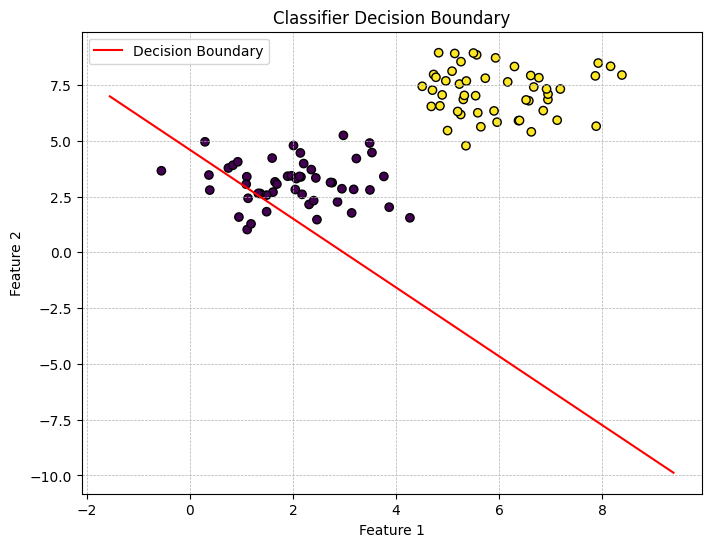

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Synthetic Data for 2 Classes
# Let's create two distinct clusters of 2D points.
np.random.seed(0) # for reproducibility

# Class 0 centered around (2, 3)
class_0_points = np.random.randn(50, 2) + np.array([2, 3])
class_0_labels = np.zeros(50)

# Class 1 centered around (6, 7)
class_1_points = np.random.randn(50, 2) + np.array([6, 7])
class_1_labels = np.ones(50)

# Combine into single datasets
X = np.vstack((class_0_points, class_1_points))
y = np.hstack((class_0_labels, class_1_labels))

# 2. Define the Classifier's Parameters
# Our input data has 2 features (x, y), and we want 1 output score.
# So, the weight matrix 'W' will have a shape of (2, 1).
# Note: These are randomly initialized. In real machine learning, a training
# process would find the optimal values for W and b.
W = np.random.randn(2, 1) * 0.1
b = np.random.randn(1) * 0.1

# 3. Make Predictions using Matrix Multiplication
# This is the core of the classifier.
# The operation X @ W calculates the weighted sum for all 100 data points at once.
scores = X @ W + b

# Classify based on the sign of the score.
# If score > 0, predict Class 1. Otherwise, predict Class 0.
predictions = (scores > 0).astype(int).flatten()

# 4. Calculate Accuracy
accuracy = np.mean(predictions == y) * 100
print(f"Classifier Accuracy (with random weights): {accuracy:.2f}%")


# 5. Visualize the Results and the Decision Boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title("Classifier Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# To plot the decision boundary (where score = 0), we use the line equation:
# w1*x1 + w2*x2 + b = 0  =>  x2 = (-w1*x1 - b) / w2
x1_boundary = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
x2_boundary = (-W[0] * x1_boundary - b) / W[1]

plt.plot(x1_boundary, x2_boundary, 'r-', label='Decision Boundary')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Classifier Accuracy: 92.00%

Sample Probabilities:
 [0.61740711 0.81456614 0.36324961 0.38911526 0.3467281 ]

Corresponding Predictions:
 [1 1 0 0 0]


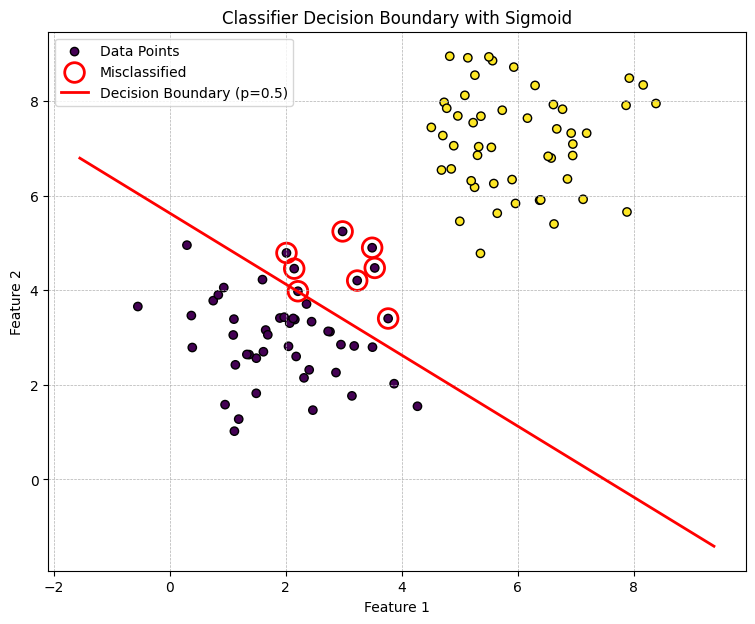

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    """Squishes any number into a range between 0 and 1."""
    return 1 / (1 + np.exp(-x))

# 1. Generate Synthetic Data for 2 Classes
np.random.seed(0) # for reproducibility

# Class 0 centered around (2, 3)
class_0_points = np.random.randn(50, 2) + np.array([2, 3])
class_0_labels = np.zeros(50)

# Class 1 centered around (6, 7)
class_1_points = np.random.randn(50, 2) + np.array([6, 7])
class_1_labels = np.ones(50)

# Combine into single datasets
X = np.vstack((class_0_points, class_1_points))
y = np.hstack((class_0_labels, class_1_labels))

# 2. Define the Classifier's Parameters (Weights and Bias)
# Input features = 2, Output scores = 1. Shape of W is (2, 1).
# These are initialized randomly. A real model would "learn" these.
W = np.array([[0.6], [0.8]]) # Manually set for a better initial boundary
b = -4.5                   # Manually set for a better initial boundary

# 3. Make Predictions using Matrix Multiplication and Sigmoid
# First, calculate the raw scores for all data points at once.
scores = X @ W + b

# Next, apply the sigmoid function to get probabilities.
probabilities = sigmoid(scores)

# Classify based on a 0.5 probability threshold.
predictions = (probabilities > 0.5).astype(int).flatten()

# 4. Calculate Accuracy
accuracy = np.mean(predictions == y) * 100
print(f"Classifier Accuracy: {accuracy:.2f}%")
print("\nSample Probabilities:\n", probabilities.flatten()[:5])
print("\nCorresponding Predictions:\n", predictions[:5])

# 5. Visualize the Results and the Decision Boundary
plt.figure(figsize=(9, 7))
# Plot the data points, colored by their true class
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', label='Data Points')

# Highlight the points that were misclassified
misclassified = X[predictions != y]
plt.scatter(misclassified[:, 0], misclassified[:, 1], s=200, facecolors='none', edgecolors='r', linewidth=2, label='Misclassified')

plt.title("Classifier Decision Boundary with Sigmoid")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# The decision boundary is where the probability is exactly 0.5,
# which happens when the score is 0.
# The line equation is: w1*x1 + w2*x2 + b = 0
x1_boundary = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
x2_boundary = (-W[0] * x1_boundary - b) / W[1]

plt.plot(x1_boundary, x2_boundary, 'r-', linewidth=2, label='Decision Boundary (p=0.5)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()